(ch:linear-correlation)=
# 선형 상관관계

상관관계는 선형 상관관계와 비선형 상관관계로 나뉜다.
선형 상관관계는 하나의 데이터 값이 증가함에 따라 다른 데이터 값이 일차함수로 
단조증가(양의 상관관계) 또는 단조감소(음의 상관관계)를 의미한다.
반면에 비선형 상관관계는 일차함수보다 복잡한 함수로 나타나는 경우를 말한다.

2차원 데이터를 다루는 대부분의 경우, 선형 상관관계 여부를 분석하며, 이를 평가하기 위한 척도로서
공분산<font size='2'>covariance</font>과 상관계수<font size='2'>correlation coefficient</font>를 사용한다.

**기본 설정**

`numpy`와 `pandas` 라이브러리를 각각 `np`와 `pd`로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`라는 별칭으로 불러온다.

In [5]:
import matplotlib.pyplot as plt

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/statsRev/tree/master/data)를 지정한다.

In [6]:
data_url = 'https://raw.githubusercontent.com/codingalzi/statsRev/refs/heads/master/data/'

## 1인당 국민총생산 데이터셋

182 개 국가의 2015년과 2020년의 1인당 국민총생산(GDP) 정보를 담고 있는 csv 파일을 데이터프레임으로 불러온다.
이때 국가명을 인덱스로 지정하며 단위는 미국 달러다.

In [7]:
gdpPerCapita_2015_2020 = pd.read_csv(data_url + "gdpPerCapita_2015_2020.csv", index_col='Country')
gdpPerCapita_2015_2020

,2015,2020
Country,,
Afghanistan,599.994,499.441
Albania,3995.383,4898.280
Algeria,4318.135,3331.080
Angola,4100.315,2021.310
Antigua and Barbuda,14414.302,14158.570
...,...,...
Venezuela,7744.746,1739.110
Vietnam,2088.344,3497.510
Yemen,1302.940,645.126


연도별로 각각 182개의 부동소수점이 포함되어 있음을 확인한다.

In [8]:
gdpPerCapita_2015_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, Afghanistan to Zimbabwe
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2015    182 non-null    float64
 1   2020    182 non-null    float64
dtypes: float64(2)
memory usage: 4.3+ KB


## 상관관계와 산점도

2015년도 1인당 GDP와 2020년도 1인당 GDP 사이의 상관관계 여부를 시각적으로 확인하기 위해
**산점도**<font size='2'>scatter plot</font>를 그려본다.
산점도는 `matplotlib.pyplot` 라이브러리에 포함된 `scatter()` 함수를 이용하여 그린다.

먼저 2015년 데이터와 2020년 데이터를 나눠 넘파이 어레이로 지정한다.

In [9]:
gdp_per_capita_2015 = np.array(gdpPerCapita_2015_2020['2015'])
gdp_per_capita_2020 = np.array(gdpPerCapita_2015_2020['2020'])

아래 코드에서 그리는 산점도는 x축이 2015년도 1인당 GDP, y축이 2020년도 1인당 GDP다.

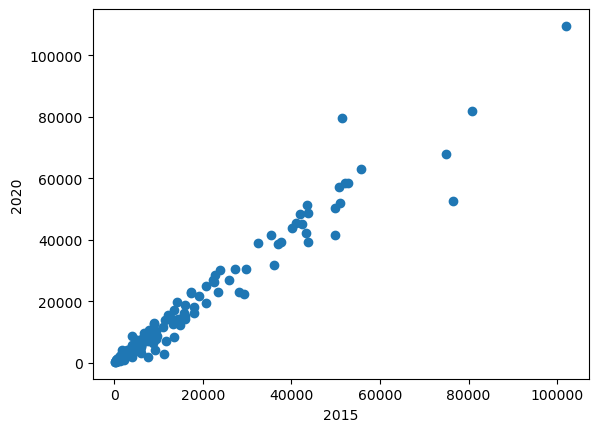

In [10]:
plt.scatter(gdp_per_capita_2015, gdp_per_capita_2020)

plt.xlabel('2015')
plt.ylabel('2020')

plt.show()

위 산점도는 2015년도 1인당 GDP가 높아질수록 2020년도 1인당 GDP도 올라가는 경향이 있음을 보여준다.
즉 두 데이터는 양의 선형 상관관계를 갖는다고 추측할 수 있다.

이제 선형 상관관계를 수치화한 두 가지 척도, 
**공분산**<font size='2'>covariance</font>과 
**상관계수**<font size='2'>correlation coefficient</font>를 통해 살펴보자. 
먼저 공분산을 소개한다.

## 공분산

{numref}`%s장 <ch:representatives>`에서
다룬 분산<font size='2'>variance</font>은 한 종류의 데이터 
$X=\{ x_1,\cdots, x_n \}$에 대해 샘플값들의 편차의 제곱의 평균값이다.
아래 식과 같이 계산되며, 샘플값들이 평균으로부터 떨어져있는 정도를 나타내는 양의 측정치이다.

$$
S_X^2 = \frac 1 n \sum_{i=1}^{n} (x_i - \bar x)^2 = \frac 1 n \left\{(x_1 - \bar x)^2 + (x_2 - \bar x)^2 + \cdots + (x_n - \bar x)^2 \right \}
$$


공분산<font size='2'>covariance</font>은 두 종류의 데이터 $X=\{ x_1, \cdots, x_n \}$와 $Y=\{ y_1,
\cdots, y_n \}$에 대해 다음과 같이 정의하며 $S_{XY}$로 표기하자.

$$
\begin{align*}
S_{XY} & = \frac 1 n \sum_{i=1}^{n} (x_i - \bar x)(y_i - \bar y) \\
&= \frac 1 n \left\{ (x_1 - \bar x)(y_1 - \bar y) + (x_2 - \bar x)(y_2 - \bar y) + \cdots + (x_n - \bar x)(y_n - \bar y) \right\}
\end{align*}
$$

위의 두 식으로부터 알 수 있는 사실은, 분산과 달리 공분산은 음수가 나올 수 있다는 것이다.
분산은 한 종류의 데이터에 대해 편차의 제곱의 평균이므로 항상 양의 값을 갖는다. 하지만 공분산은 두 종류의 데이터에 대해 편차의 곱의 평균인데, 곱해지는 편차의 부호가 다른 항들은 음수가 되므로 평균 또한 음수가 될 수 있다.

넘파이와 판다스 모두 공분산을 계산하는 API를 제공하는데, 넘파이의 `cov()`와 데이터프레임의 `cov()`가 그것이다.

**넘파이의 `cov()` 함수**

아래 코드는 넘파이의 `cov()` 함수를 이용해 두 데이터의 공분산을 계산한다. (2, 2) 행렬 모양의 어레이가 생성되는데, 이 어레이의 항목별 의미는 다음과 같다.


| 인덱스 | 의미 |
| :---: | :--- |
| `[0, 0]` | 2015년도 1인당 GDP의 분산 |
| `[0, 1]` | 2015년도 1인당 GDP와 2020년도 1인당 GDP의 공분산 |
| `[1, 0]` | 2020년도 1인당 GDP와 2015년도 1인당 GDP의 공분산 |
| `[1, 1]` | 2020년도 1인당 GDP의 분산 |

In [11]:
cov_mat = np.cov(gdp_per_capita_2015, gdp_per_capita_2020, ddof=0)
cov_mat

array([[3.060020e+08, 3.146226e+08],
       [3.146226e+08, 3.378031e+08]])

공분산의 계산식으로부터 알 수 있듯이, '2015년도 1인당 GDP와 2020년도 1인당 GDP의 공분산'과
'2020년도 1인당 GDP와 2015년도 1인당 GDP의 공분산'은 동일하다. 
아래 두 코드는 각 연도별 공분산은 해당 연도의 표본분산과 일치하는지 확인해준다.

In [12]:
print("2015년도 1인당 GDP 분산:", np.var(gdp_per_capita_2015, ddof=0))

2015년도 1인당 GDP 분산: 306002004.4529384


In [13]:
print("2020년도 1인당 GDP분산:", np.var(gdp_per_capita_2020, ddof=0))

2020년도 1인당 GDP분산: 337803085.89880574


**데이터프레임의 `cov()` 메서드**

데이터프레임 객체의 `cov()` 메서드는 모든 특성들 사이의 공분산을 계산한다.
데이터프레임`gdpPerCapita_2015_2020`에 `2015`와 `2020` 두 개의 특성이 있으므로, (2, 2) 행렬 모양의 데이터프레임을 생성한다.

앞서 `np.cov()`의 반환값을 설명할 때 사용된 인덱스가 여기서는 특성명으로 대체된다.

In [14]:
gdpPerCapita_2015_2020.cov(ddof=0)

,2015,2020
2015,3.060020e+08,3.146226e+08
2020,3.146226e+08,3.378031e+08


**참고**

`ddof=1`로 지정하면 불편분산이 계산된다.

In [15]:
cov_mat = np.cov(gdp_per_capita_2015, gdp_per_capita_2020, ddof=1)
cov_mat

array([[3.076926e+08, 3.163608e+08],
       [3.163608e+08, 3.396694e+08]])

In [16]:
gdpPerCapita_2015_2020.cov(ddof=1)

,2015,2020
2015,3.076926e+08,3.163608e+08
2020,3.163608e+08,3.396694e+08


## 상관계수

공분산은 데이터의 크기와 단위에 따라 계산된 값의 크기와 단위가 달라진다.
예를 들어 학생들의 키와 체중을 대상으로 공분산을 계산한다면 단위가 `cm * kg`이 되고,
멀리뛰기와 오래 매달리기의 공분산은 단위가 `m * sec`이 된다.
또한, 동일한 단위를 사용한다 하더라도 데이터 값의 척도(scale)에 따라 공분산 값도 많이 달라질 수 있다.

따라서 공분산 값의 절대적 크기는 선형 상관관계의 강도를 측정하는 기준이 될 수 없다. 이 점을 보완한 척도가 **상관계수**<font size='2'>correlation coefficient</font>이다. 여러가지 상관계수가 있으나, 가장 대표적인 것이 **피어슨 상관계수**<font size='2'>Pearson correlation coefficient</font>이다. 데이터 $X$와 $Y$의 피어슨 상관계수 $r_{XY}$는 공분산 $S_{XY}$을 각 데이터의 표준편차 $S_X$와 $S_Y$로 나눈 값이다. 아래 계산식으로부터 알 수 있듯이, 두 데이터의 단위 및 척도(scale)와 무관한, 항상 -1과 1 사이의 값이 나온다.

$$
r_{xy} = \frac{S_{xy}}{S_x \cdot S_y}
$$

피어슨 상관계수의 값으로부터 두 데이터의 상관관계는 다음과 같이 평가된다.

| 상관계수 | 의미 |
| :--- | :--- |
| 1에 가까운 값 | 양의 상관관계가 강함 |
| -1에 가까운 값 | 음의 상관관계가 강함 |
| 0에 가까운 값 | 상관관계가 거의 없음 |

아래 그림은 다양한 상관계수에 대응되는 산점도들이다.
상관계수의 절댓값이 1에 가까워질수록 산점도가 직선에 가까워지며,
0에 가까워질수록 산점도가 여러 방향으로 넓게 퍼져 두 데이터의 상관관계가 모호해진다.

<p><div align="center"><img src="https://github.com/codingalzi/statsRev/blob/master/jupyter-book/images/pearson_correlation.png?raw=true" style="width:700px"></div></p>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://en.wikipedia.org/wiki/Pearson_correlation_coefficient">(Wikipedia) 피어슨 상관계수</a>&gt;</div></p>

**`np.corrcoef()` 함수**

상관계수는 넘파이의 `corrcoef()` 함수와 데이터프레임의 `corr()` 메서드로 계산할 수 있다.

넘파이 `corrcoef()` 함수의 반환값 모양과 항목별 의미는 공분산 `cov()` 함수의 경우와 동일하다.
2015년도 1인당 GDP와 2020년도 1인당 GDP의 상관계수는 0.98 정도로 1에 무척 가깝다.
따라서 두 데이터 사이의 선형 상관관계는 매우 크다고 평가할 수 있다.

In [18]:
np.corrcoef(gdp_per_capita_2015, gdp_per_capita_2020)

array([[1.      , 0.978579],
       [0.978579, 1.      ]])

**데이터프레임의 `corr()` 메서드**

데이터프레임의 `corr()` 메서드도 동일한 결과를 보여준다.

In [19]:
gdpPerCapita_2015_2020.corr()

,2015,2020
2015,1.000000,0.978579
2020,0.978579,1.000000


## 연습문제

참고: [(연습) 2차원 데이터](https://colab.research.google.com/github/codingalzi/statsRev/blob/master/practices/practice-twoD_data.ipynb)